In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np
import scipy as sc
from mpl_toolkits import mplot3d
from array import *
from scipy.integrate import *
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from numpy.random import normal
from numpy import hstack

from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.ticker import FuncFormatter, MultipleLocator

!pip install pymannkendall
import pymannkendall as mk

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100
# plt.rcParams['figure.figsize'] = [10.24, 7.6]
# plt.rcParams['figure.dpi'] = 300

In [2]:
naon = pd.read_csv("n_jan_mar.csv")
naop = pd.read_csv("p_jan_mar.csv")

In [3]:
naon


,Unnamed: 0,yymo,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_sflow_ssurge,nint_pcp_ssurg
0,0,196501,0.0,5.000000,6.000000,1965.0,1.0,6.000000,1.610000,6.530000,...,0.679268,196501.0,-0.95,1.750000,15.400000,1.705215,1.705215,1.531748,1.277509,1.450975
1,1,196502,1.5,51.000000,52.000000,1965.0,2.0,21.000000,1.550000,1.730000,...,0.661609,196502.0,-0.61,1.685000,23.100000,1.485656,1.485656,0.935930,0.701454,1.251179
2,2,196601,6.0,372.333333,373.333333,1966.0,1.0,8.333333,1.873333,11.296667,...,0.970844,196601.0,-0.67,1.780000,52.600000,1.833100,1.833100,1.162905,1.148179,1.818373
3,3,196602,9.5,407.750000,408.750000,1966.0,2.0,12.750000,1.687500,6.350000,...,0.871797,196602.0,-0.43,1.790000,10.015000,1.615629,1.615629,1.211000,1.122992,1.527620
4,5,196701,13.5,759.000000,760.000000,1967.0,1.0,30.000000,1.690000,10.200000,...,0.892898,196701.0,-0.24,1.680000,14.700000,1.804220,1.804220,1.138531,1.066174,1.731863
5,6,196702,15.5,774.500000,775.500000,1967.0,2.0,14.500000,1.625000,11.850000,...,0.785286,196702.0,-0.25,1.705000,31.250000,1.791470,1.791470,1.043415,0.890412,1.638467
6,9,196801,22.5,1108.250000,1109.250000,1968.0,1.0,14.250000,1.597500,4.205000,...,0.849245,196801.0,-0.65,1.722500,8.990000,1.435101,1.435101,1.131104,1.078446,1.382443
7,10,196802,25.5,1140.500000,1141.500000,1968.0,2.0,15.500000,1.700000,3.720000,...,0.899496,196802.0,-0.19,1.700000,12.670000,1.653927,1.653927,1.727273,1.659920,1.586574
8,15,196901,35.5,1481.000000,1482.000000,1969.0,1.0,21.000000,1.940000,4.620000,...,0.980365,196901.0,-0.71,1.825000,19.700000,1.718921,1.718921,1.177993,1.161482,1.702410
9,16,196903,37.0,1528.000000,1529.000000,1969.0,3.0,9.000000,1.570000,2.280000,...,0.942178,196903.0,-1.21,1.660000,29.000000,1.536466,1.536466,1.184177,1.215989,1.568277


In [4]:
naop

,Unnamed: 0,yymo,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_sflow_ssurge,pint_pcp_ssurg
0,3,197001,40.5,1841.500000,1842.500000,1970.0,1.0,16.500000,1.720000,2.830000,...,0.825625,197001.0,1.06,1.757500,22.700000,1.475504,1.475504,1.359253,1.214698,1.330948
1,4,197003,43.0,1893.000000,1894.000000,1970.0,3.0,9.000000,1.580000,4.880000,...,0.774576,197003.0,1.20,1.660000,8.620000,1.645608,1.645608,1.156318,1.015683,1.504973
2,10,197702,117.0,4394.600000,4395.600000,1977.0,2.0,8.600000,1.756000,9.734000,...,0.952378,197702.0,1.51,1.800000,26.500000,1.706541,1.706541,1.342547,1.317914,1.681907
3,11,197801,126.0,4710.000000,4711.000000,1978.0,1.0,11.000000,1.660000,0.860000,...,0.414255,197801.0,0.58,1.660000,21.800000,1.466339,1.466339,1.556165,1.015683,0.925857
4,12,197803,127.0,4749.000000,4750.000000,1978.0,3.0,9.000000,1.560000,0.210000,...,0.780760,197803.0,1.13,1.800000,0.520000,1.206617,1.206617,1.011284,0.888946,1.084279
5,14,198001,144.5,5369.500000,5370.500000,1980.0,1.0,6.000000,1.440000,8.295000,...,0.494581,198001.0,0.06,1.870000,14.290000,1.394333,1.394333,0.887926,0.763005,1.269412
6,15,198002,146.5,5411.500000,5412.500000,1980.0,2.0,18.500000,1.725000,2.885000,...,0.941731,198002.0,0.58,1.725000,10.325000,1.603914,1.603914,1.039589,1.007618,1.571943
7,19,198201,161.0,6047.333333,6048.333333,1982.0,1.0,17.333333,1.626667,9.950000,...,0.510901,198201.0,0.11,1.813333,34.933333,1.498449,1.498449,1.009648,0.622700,1.111501
8,22,198301,173.5,6411.000000,6412.000000,1983.0,1.0,16.000000,1.680000,1.535000,...,0.533629,198301.0,0.40,1.680000,19.800000,1.532896,1.532896,1.205406,0.777445,1.104934
9,23,198302,176.0,6449.000000,6450.000000,1983.0,2.0,23.000000,1.743333,7.003333,...,0.897701,198302.0,0.97,1.743333,33.200000,1.463301,1.463301,1.102214,1.027647,1.388733


In [5]:
# naon.groupby(naon.yymo).(['emp_pcp', 'emp_twl', 'emp_sflow', 'emp_skewv']).mean()
naon_avg=naon.groupby(naon.yymo).mean()
naon_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_sflow_ssurge,nint_pcp_ssurg
yymo,,,,,,,,,,,,,,,,,,,,,
196501,0,0.0,5.000000,6.000000,1965.0,1.0,6.000000,1.610000,6.530000,60.300000,...,0.679268,196501.0,-0.95,1.750000,15.400000,1.705215,1.705215,1.531748,1.277509,1.450975
196502,1,1.5,51.000000,52.000000,1965.0,2.0,21.000000,1.550000,1.730000,9.430000,...,0.661609,196502.0,-0.61,1.685000,23.100000,1.485656,1.485656,0.935930,0.701454,1.251179
196601,2,6.0,372.333333,373.333333,1966.0,1.0,8.333333,1.873333,11.296667,17.900000,...,0.970844,196601.0,-0.67,1.780000,52.600000,1.833100,1.833100,1.162905,1.148179,1.818373
196602,3,9.5,407.750000,408.750000,1966.0,2.0,12.750000,1.687500,6.350000,23.425000,...,0.871797,196602.0,-0.43,1.790000,10.015000,1.615629,1.615629,1.211000,1.122992,1.527620
196701,5,13.5,759.000000,760.000000,1967.0,1.0,30.000000,1.690000,10.200000,17.600000,...,0.892898,196701.0,-0.24,1.680000,14.700000,1.804220,1.804220,1.138531,1.066174,1.731863
196702,6,15.5,774.500000,775.500000,1967.0,2.0,14.500000,1.625000,11.850000,13.500000,...,0.785286,196702.0,-0.25,1.705000,31.250000,1.791470,1.791470,1.043415,0.890412,1.638467
196801,9,22.5,1108.250000,1109.250000,1968.0,1.0,14.250000,1.597500,4.205000,21.675000,...,0.849245,196801.0,-0.65,1.722500,8.990000,1.435101,1.435101,1.131104,1.078446,1.382443
196802,10,25.5,1140.500000,1141.500000,1968.0,2.0,15.500000,1.700000,3.720000,101.000000,...,0.899496,196802.0,-0.19,1.700000,12.670000,1.653927,1.653927,1.727273,1.659920,1.586574
196901,15,35.5,1481.000000,1482.000000,1969.0,1.0,21.000000,1.940000,4.620000,18.100000,...,0.980365,196901.0,-0.71,1.825000,19.700000,1.718921,1.718921,1.177993,1.161482,1.702410


In [6]:
naop_avg=naop.groupby(naop.yymo).mean()
naop_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_sflow_ssurge,pint_pcp_ssurg
yymo,,,,,,,,,,,,,,,,,,,,,
197001,3,40.5,1841.500000,1842.500000,1970.0,1.0,16.500000,1.720000,2.830000,34.925000,...,0.825625,197001.0,1.06,1.757500,22.700000,1.475504,1.475504,1.359253,1.214698,1.330948
197003,4,43.0,1893.000000,1894.000000,1970.0,3.0,9.000000,1.580000,4.880000,22.300000,...,0.774576,197003.0,1.20,1.660000,8.620000,1.645608,1.645608,1.156318,1.015683,1.504973
197702,10,117.0,4394.600000,4395.600000,1977.0,2.0,8.600000,1.756000,9.734000,32.680000,...,0.952378,197702.0,1.51,1.800000,26.500000,1.706541,1.706541,1.342547,1.317914,1.681907
197801,11,126.0,4710.000000,4711.000000,1978.0,1.0,11.000000,1.660000,0.860000,60.900000,...,0.414255,197801.0,0.58,1.660000,21.800000,1.466339,1.466339,1.556165,1.015683,0.925857
197803,12,127.0,4749.000000,4750.000000,1978.0,3.0,9.000000,1.560000,0.210000,13.600000,...,0.780760,197803.0,1.13,1.800000,0.520000,1.206617,1.206617,1.011284,0.888946,1.084279
198001,14,144.5,5369.500000,5370.500000,1980.0,1.0,6.000000,1.440000,8.295000,24.350000,...,0.494581,198001.0,0.06,1.870000,14.290000,1.394333,1.394333,0.887926,0.763005,1.269412
198002,15,146.5,5411.500000,5412.500000,1980.0,2.0,18.500000,1.725000,2.885000,11.070000,...,0.941731,198002.0,0.58,1.725000,10.325000,1.603914,1.603914,1.039589,1.007618,1.571943
198201,19,161.0,6047.333333,6048.333333,1982.0,1.0,17.333333,1.626667,9.950000,13.933333,...,0.510901,198201.0,0.11,1.813333,34.933333,1.498449,1.498449,1.009648,0.622700,1.111501
198301,22,173.5,6411.000000,6412.000000,1983.0,1.0,16.000000,1.680000,1.535000,22.600000,...,0.533629,198301.0,0.40,1.680000,19.800000,1.532896,1.532896,1.205406,0.777445,1.104934


In [7]:
naon_avg['nint_twl_pcp']=   naon_avg['emp_pcp'] + naon_avg['emp_twl']          # 1) TWL and pcp
naon_avg['nint_twl_sflow']= naon_avg['emp_twl'] + naon_avg['emp_sflow']          # 2) TWL and streamflow 
naon_avg['nint_sflow_ssurge']=naon_avg['emp_sflow'] + naon_avg['emp_skewv']         # 3) sflow and skewsurge
naon_avg['nint_pcp_ssurg']= naon_avg['emp_pcp'] + naon_avg['emp_skewv']         #4) pcp and skewsurge

In [8]:
naop_avg['pint_twl_pcp']=   naop_avg['emp_pcp'] + naop_avg['emp_twl']           # 1) TWL and pcp
naop_avg['pint_twl_sflow']= naop_avg['emp_twl'] + naop_avg['emp_sflow']          # 2) TWL and streamflow 
naop_avg['pint_sflow_ssurge']=naop_avg['emp_sflow'] + naop_avg['emp_skewv']             # 3) TWL and skewsurge
naop_avg['pint_pcp_ssurg']= naop_avg['emp_pcp'] + naop_avg['emp_skewv']            #4) pcp and skewsurge

In [9]:
naon_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_sflow_ssurge,nint_pcp_ssurg
yymo,,,,,,,,,,,,,,,,,,,,,
196501,0,0.0,5.000000,6.000000,1965.0,1.0,6.000000,1.610000,6.530000,60.300000,...,0.679268,196501.0,-0.95,1.750000,15.400000,1.705215,1.705215,1.531748,1.277509,1.450975
196502,1,1.5,51.000000,52.000000,1965.0,2.0,21.000000,1.550000,1.730000,9.430000,...,0.661609,196502.0,-0.61,1.685000,23.100000,1.485656,1.485656,0.935930,0.701454,1.251179
196601,2,6.0,372.333333,373.333333,1966.0,1.0,8.333333,1.873333,11.296667,17.900000,...,0.970844,196601.0,-0.67,1.780000,52.600000,1.833100,1.833100,1.162905,1.148179,1.818373
196602,3,9.5,407.750000,408.750000,1966.0,2.0,12.750000,1.687500,6.350000,23.425000,...,0.871797,196602.0,-0.43,1.790000,10.015000,1.615629,1.615629,1.211000,1.122992,1.527620
196701,5,13.5,759.000000,760.000000,1967.0,1.0,30.000000,1.690000,10.200000,17.600000,...,0.892898,196701.0,-0.24,1.680000,14.700000,1.804220,1.804220,1.138531,1.066174,1.731863
196702,6,15.5,774.500000,775.500000,1967.0,2.0,14.500000,1.625000,11.850000,13.500000,...,0.785286,196702.0,-0.25,1.705000,31.250000,1.791470,1.791470,1.043415,0.890412,1.638467
196801,9,22.5,1108.250000,1109.250000,1968.0,1.0,14.250000,1.597500,4.205000,21.675000,...,0.849245,196801.0,-0.65,1.722500,8.990000,1.435101,1.435101,1.131104,1.078446,1.382443
196802,10,25.5,1140.500000,1141.500000,1968.0,2.0,15.500000,1.700000,3.720000,101.000000,...,0.899496,196802.0,-0.19,1.700000,12.670000,1.653927,1.653927,1.727273,1.659920,1.586574
196901,15,35.5,1481.000000,1482.000000,1969.0,1.0,21.000000,1.940000,4.620000,18.100000,...,0.980365,196901.0,-0.71,1.825000,19.700000,1.718921,1.718921,1.177993,1.161482,1.702410


In [10]:
naop_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_sflow_ssurge,pint_pcp_ssurg
yymo,,,,,,,,,,,,,,,,,,,,,
197001,3,40.5,1841.500000,1842.500000,1970.0,1.0,16.500000,1.720000,2.830000,34.925000,...,0.825625,197001.0,1.06,1.757500,22.700000,1.475504,1.475504,1.359253,1.214698,1.330948
197003,4,43.0,1893.000000,1894.000000,1970.0,3.0,9.000000,1.580000,4.880000,22.300000,...,0.774576,197003.0,1.20,1.660000,8.620000,1.645608,1.645608,1.156318,1.015683,1.504973
197702,10,117.0,4394.600000,4395.600000,1977.0,2.0,8.600000,1.756000,9.734000,32.680000,...,0.952378,197702.0,1.51,1.800000,26.500000,1.706541,1.706541,1.342547,1.317914,1.681907
197801,11,126.0,4710.000000,4711.000000,1978.0,1.0,11.000000,1.660000,0.860000,60.900000,...,0.414255,197801.0,0.58,1.660000,21.800000,1.466339,1.466339,1.556165,1.015683,0.925857
197803,12,127.0,4749.000000,4750.000000,1978.0,3.0,9.000000,1.560000,0.210000,13.600000,...,0.780760,197803.0,1.13,1.800000,0.520000,1.206617,1.206617,1.011284,0.888946,1.084279
198001,14,144.5,5369.500000,5370.500000,1980.0,1.0,6.000000,1.440000,8.295000,24.350000,...,0.494581,198001.0,0.06,1.870000,14.290000,1.394333,1.394333,0.887926,0.763005,1.269412
198002,15,146.5,5411.500000,5412.500000,1980.0,2.0,18.500000,1.725000,2.885000,11.070000,...,0.941731,198002.0,0.58,1.725000,10.325000,1.603914,1.603914,1.039589,1.007618,1.571943
198201,19,161.0,6047.333333,6048.333333,1982.0,1.0,17.333333,1.626667,9.950000,13.933333,...,0.510901,198201.0,0.11,1.813333,34.933333,1.498449,1.498449,1.009648,0.622700,1.111501
198301,22,173.5,6411.000000,6412.000000,1983.0,1.0,16.000000,1.680000,1.535000,22.600000,...,0.533629,198301.0,0.40,1.680000,19.800000,1.532896,1.532896,1.205406,0.777445,1.104934


# 1) TWL and pcp (intensity) - neagtive phase

Mann_Kendall_Test(trend='decreasing', h=True, p=0.005075815516975224, z=-2.8021824733528233, Tau=-0.2606060606060606, s=-387.0, var_s=18975.0, slope=-0.004137919638888894, intercept=1.6905156555357146)


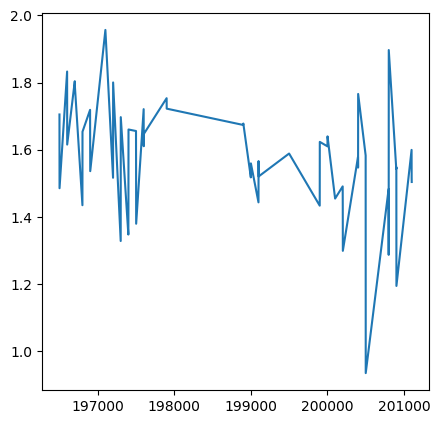

In [11]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_twl_pcp)
result = mk.original_test(naon_avg.nint_twl_pcp)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg, nint_pcp_ssurg

# 2) TWL and streamflow (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.5614000556157759, z=0.5807632069125023, Tau=0.05454545454545454, s=81.0, var_s=18975.0, slope=0.0009579013794871768, intercept=1.1521297777538462)


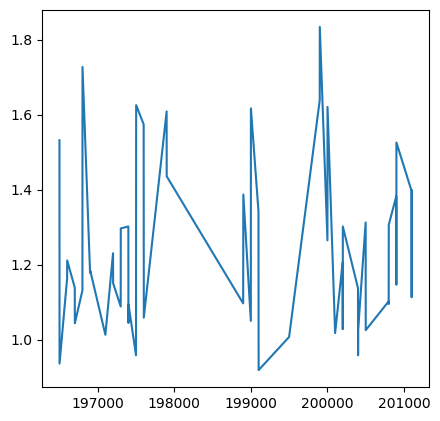

In [12]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_twl_sflow)
result = mk.original_test(naon_avg.nint_twl_sflow)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 3) TWL and skewsurge (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.11351728455021748, z=1.5825797388365686, Tau=0.14747474747474748, s=219.0, var_s=18975.0, slope=0.002545794533333338, intercept=1.0794423909333333)


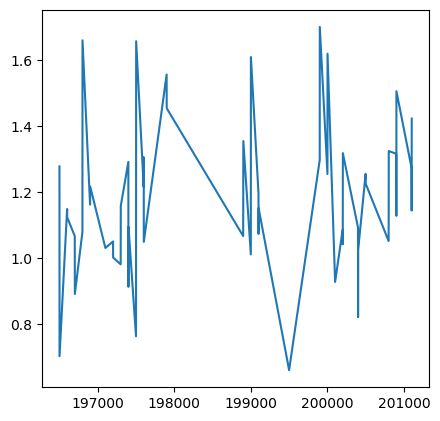

In [13]:
plt.plot(naon_avg.nao_yymmo, naon_avg.nint_sflow_ssurge)
result = mk.original_test(naon_avg.nint_sflow_ssurge)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 4) pcp and skewsurge (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.19130876964763566, z=-1.30671721555313, Tau=-0.12188552188552189, s=-181.0, var_s=18975.0, slope=-0.002232156414965989, intercept=1.5878883942040816)


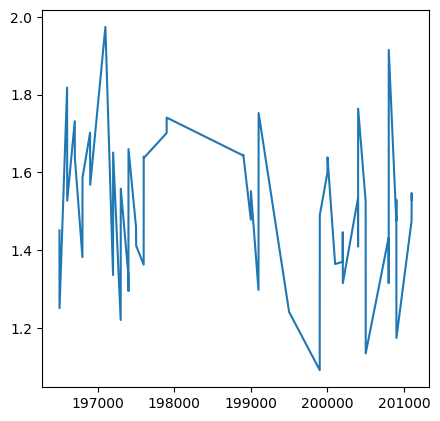

In [14]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_pcp_ssurg)
result = mk.original_test(naon_avg.nint_pcp_ssurg)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 1)TWL and pcp (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.828404904759906, z=-0.2167477866607972, Tau=-0.024390243902439025, s=-21.0, var_s=8514.333333333334, slope=-0.0003342103787878813, intercept=1.4818497191401516)


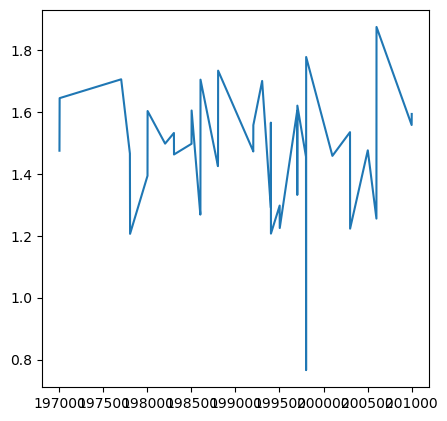

In [15]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_pcp)
result = mk.original_test(naop_avg.pint_twl_pcp)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 2)TWL and streamflow (intensity)- positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.48793753671895557, z=0.693592917314551, Tau=0.07549361207897794, s=65.0, var_s=8514.333333333334, slope=0.00168993583472223, intercept=1.072682381354861)


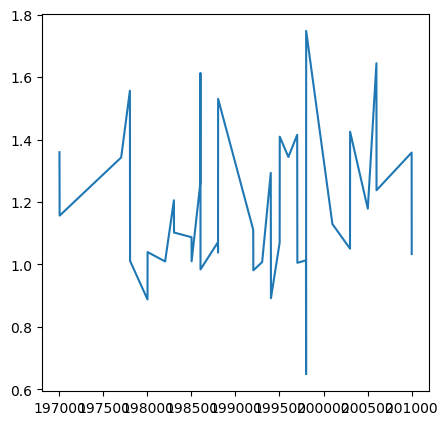

In [16]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_sflow)
result = mk.original_test(naop_avg.pint_twl_sflow)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 3) TWL and skewsurge (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.05787355034166719, z=1.8966545166478666, Tau=0.20441347270615565, s=176.0, var_s=8513.333333333334, slope=0.005455095490196091, intercept=0.9098352964509803)


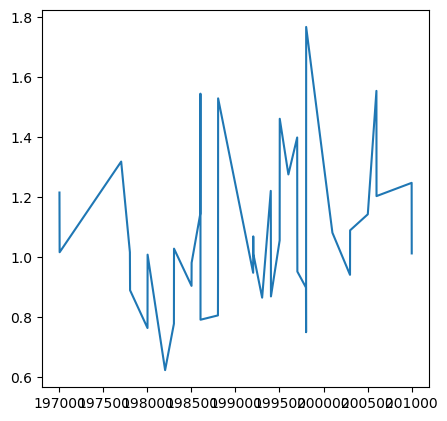

In [17]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_sflow_ssurge)
result = mk.original_test(naop_avg.pint_sflow_ssurge)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 4) pcp and skewsurge (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.20096328781426642, z=1.2788119412987033, Tau=0.13821138211382114, s=119.0, var_s=8514.333333333334, slope=0.003954074427777787, intercept=1.267689827247222)


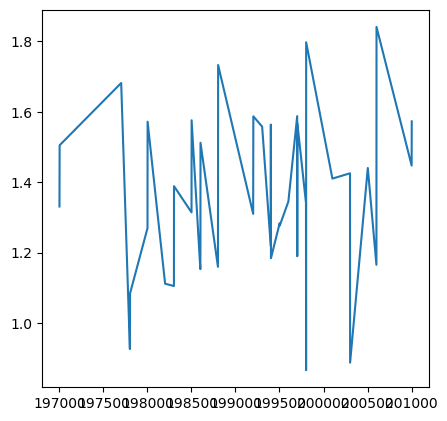

In [18]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_pcp_ssurg)
result = mk.original_test(naop_avg.pint_pcp_ssurg)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 1)TWL and pcp (intensity) - negative phase - correlation

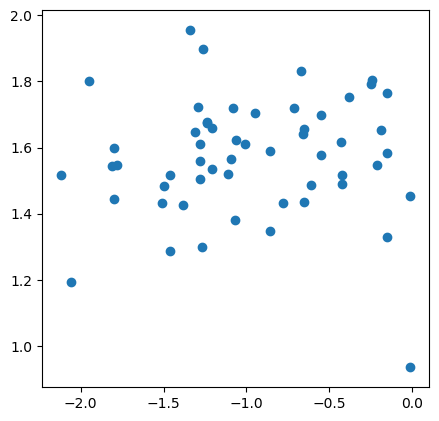

Kendall correlation coefficient: 0.090
Samples are uncorrelated (fail to reject H0) p=0.334


In [19]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_twl_pcp)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_twl_pcp)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 2) TWL and streamflow (intensity) - neagtive phase - correlation

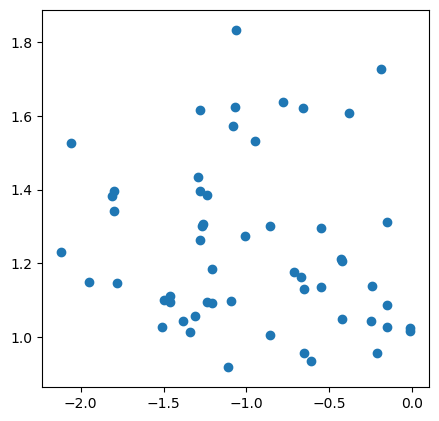

Kendall correlation coefficient: -0.125
Samples are uncorrelated (fail to reject H0) p=0.179


In [20]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_twl_sflow)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_twl_sflow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 3) TWL and skewsurge (intensity) - neagtive phase - correlation

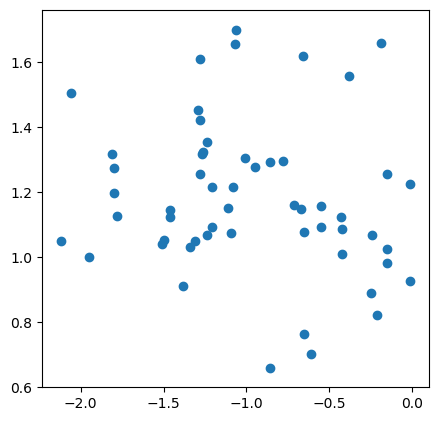

Kendall correlation coefficient: -0.109
Samples are uncorrelated (fail to reject H0) p=0.242


In [21]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_sflow_ssurge)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_sflow_ssurge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 4) pcp and skewsurge (intensity) - neagtive phase - correlation

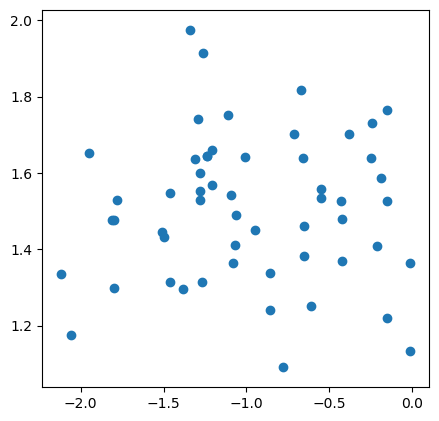

Kendall correlation coefficient: -0.002
Samples are uncorrelated (fail to reject H0) p=0.983


In [22]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_pcp_ssurg)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_pcp_ssurg)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 1)TWL and pcp (intensity) - positive phase- correlation

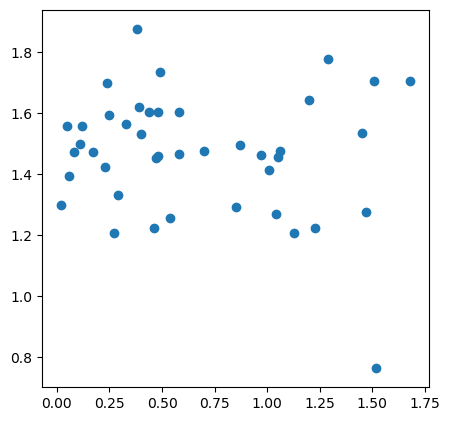

Kendall correlation coefficient: -0.034
Samples are uncorrelated (fail to reject H0) p=0.753


In [23]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_twl_pcp)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_twl_pcp)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 2)TWL and streamflow (intensity)- positive phase- correlation

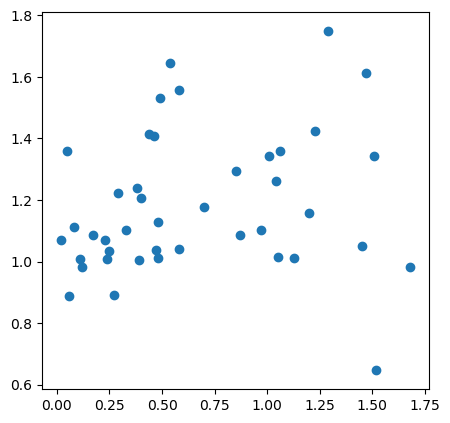

Kendall correlation coefficient: 0.197
Samples are uncorrelated (fail to reject H0) p=0.067


In [24]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_twl_sflow)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_twl_sflow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 3) TWL and skewsurge (intensity) - positive phase- correlation

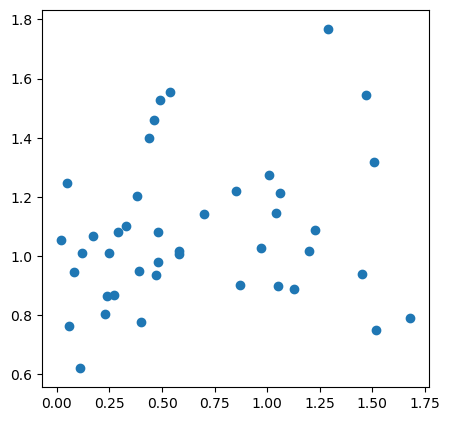

Kendall correlation coefficient: 0.156
Samples are uncorrelated (fail to reject H0) p=0.146


In [25]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_sflow_ssurge)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_sflow_ssurge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 4) pcp and skewsurge (intensity) - positive phase- correlation

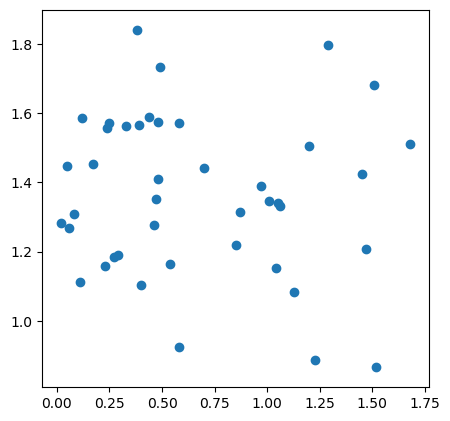

Kendall correlation coefficient: -0.043
Samples are uncorrelated (fail to reject H0) p=0.688


In [26]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_pcp_ssurg)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_pcp_ssurg)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

In [27]:
# naon_avg.to_csv('naon_avg.csv')
# naop_avg.to_csv('naop_avg.csv')